In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [11]:
import pandas as pd
# Convert X to a DataFrame (if it's not already one)
X = pd.DataFrame(X)
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [12]:
# Calculate the number of missing values
missing_values = X.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = X.isnull().mean() * 100

# Combine both into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Display the missing values and percentages for each column
print("Missing Value Summary for Each Column:")
print(missing_summary)


Missing Value Summary for Each Column:
             Missing Values  Missing Percentage (%)
age                       0                0.000000
job                     288                0.637013
marital                   0                0.000000
education              1857                4.107407
default                   0                0.000000
balance                   0                0.000000
housing                   0                0.000000
loan                      0                0.000000
contact               13020               28.798301
day_of_week               0                0.000000
month                     0                0.000000
duration                  0                0.000000
campaign                  0                0.000000
pdays                     0                0.000000
previous                  0                0.000000
poutcome              36959               81.747805


In [20]:
# Drop the contact column
X = X.drop(columns=['contact'])
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  duration  campaign  pdays

In [14]:
# Replace missing values in 'pdays' and 'poutcome' columns with their mode
X['poutcome'] = X['poutcome'].fillna(X['poutcome'].mode()[0])

In [15]:
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [16]:
df = pd.DataFrame(X)

# Remove rows where 'education' is NaN
df_cleaned = df.dropna(subset=['education','job'])

# Display the cleaned DataFrame
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [8]:
# y = y.loc[X.index]
# X['y'] = y

In [ ]:
# print(X.head)

In [17]:
# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_columns)
print("Categorical Features:", categorical_columns)


Numerical Features: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
# from scipy.stats import chi2_contingency
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Loop through each categorical column
# for col in categorical_columns:
#     if col != 'y':  # Skip the target column itself
#         print(f"Analyzing relationship between '{col}' and 'y'...")

#         # Cross-tabulation
#         crosstab = pd.crosstab(X[col], X['y'])
#         print(crosstab)

#         # Perform Chi-Square Test
#         chi2, p, dof, expected = chi2_contingency(crosstab)
#         print(f"Chi-Square Statistic = {chi2}, p-value = {p}\n")

#         # Visualization: Bar plot
#         sns.countplot(x=col, hue='y', data=X)
#         plt.title(f"{col} vs Target (y)")
#         plt.xticks(rotation=45)
#         plt.show()


In [ ]:
# Convert 'y' to numerical values
# X['y'] = X['y'].map({'yes': 1, 'no': 0})


In [ ]:
# # Correlation
# correlations = X[numerical_columns + ['y']].corr()['y'].sort_values()
# print("Correlation with target (y):")
# print(correlations)

# # Visualization: Box plot and scatter plot
# for col in numerical_columns:
#     sns.boxplot(x='y', y=col, data=X)
#     plt.title(f"{col} vs Target (y) - Box Plot")
#     plt.show()

#     sns.scatterplot(x=col, y='y', data=X)
#     plt.title(f"{col} vs Target (y) - Scatter Plot")
#     plt.show()


In [18]:
# Add 'y' column back to df_cleaned
df_cleaned['y'] = y

# Display the updated DataFrame
print(df_cleaned.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0  failure  no  
1     NaN            5   may       151         1     -1         0  failure  no  
2     NaN            5   may        76         1     -1         0  failure  no  
5     NaN            5   may       139         1     -1         0  failure  no  
6     NaN            5   may       217         1     -1         0  failure  no  


<ipython-input-18-fdb65283eb9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['y'] = y


Analyzing relationship between 'job' and 'y'...
y                no   yes
job                      
admin.         4387   613
blue-collar    8603   675
entrepreneur   1295   116
housemaid      1090   105
management     7963  1253
retired        1659   486
self-employed  1358   182
services       3654   350
student         549   226
technician     6538   817
unemployed     1076   198
Chi-Square Statistic = 772.4886316546689, p-value = 1.690329500153999e-159



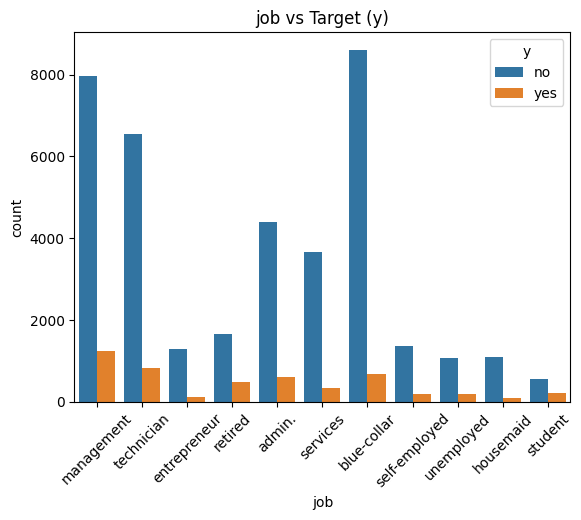

Analyzing relationship between 'marital' and 'y'...
y            no   yes
marital              
divorced   4430   598
married   23343  2603
single    10399  1820
Chi-Square Statistic = 191.58127409263932, p-value = 2.5041187079195114e-42



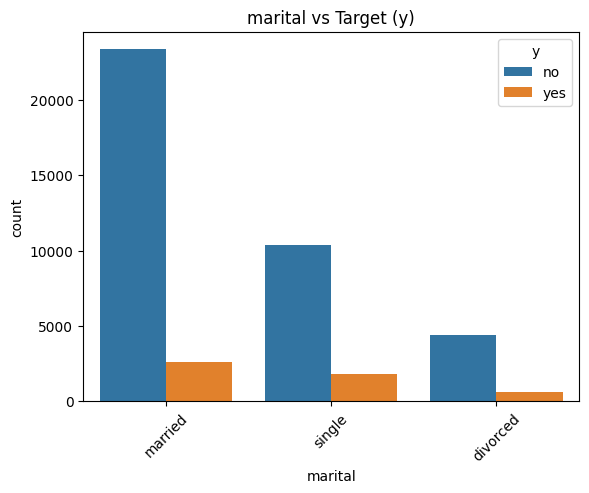

Analyzing relationship between 'education' and 'y'...
y             no   yes
education             
primary     6212   588
secondary  20690  2441
tertiary   11270  1992
Chi-Square Statistic = 233.40066357580014, p-value = 2.078212095907046e-51



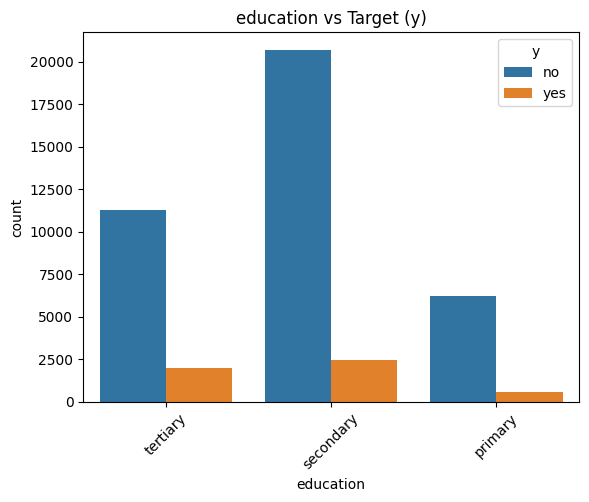

Analyzing relationship between 'default' and 'y'...
y           no   yes
default             
no       37438  4973
yes        734    48
Chi-Square Statistic = 22.79481012048514, p-value = 1.8025181186150768e-06



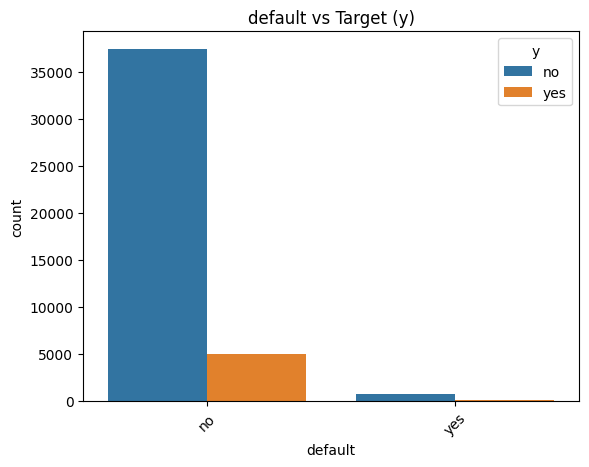

Analyzing relationship between 'housing' and 'y'...
y           no   yes
housing             
no       15754  3147
yes      22418  1874
Chi-Square Statistic = 825.2788351221966, p-value = 1.7222372972004139e-181



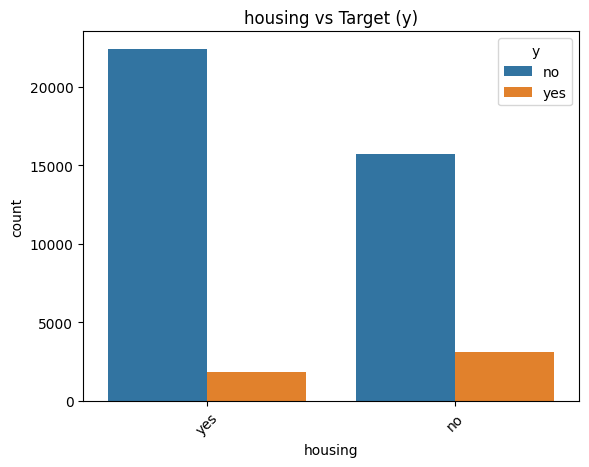

Analyzing relationship between 'loan' and 'y'...
y        no   yes
loan             
no    31538  4548
yes    6634   473
Chi-Square Statistic = 203.8861140556309, p-value = 2.9637019493258665e-46



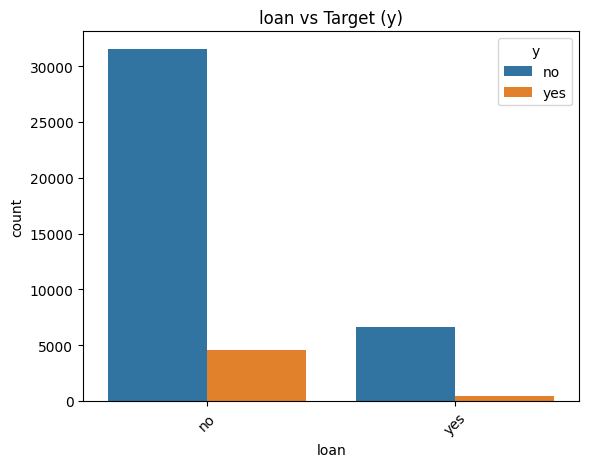

Analyzing relationship between 'contact' and 'y'...
y             no   yes
contact               
cellular   24050  4163
telephone   2344   350
Chi-Square Statistic = 5.994443628163291, p-value = 0.01435100646162061



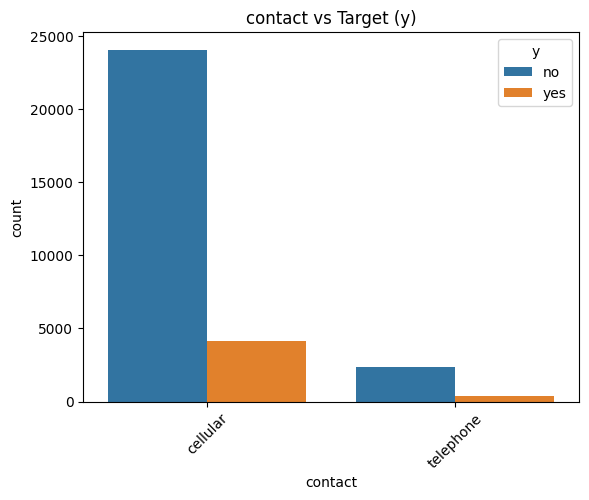

Analyzing relationship between 'month' and 'y'...
y         no  yes
month            
apr     2277  543
aug     5378  659
dec      107   93
feb     2115  418
jan     1186  132
jul     6015  586
jun     4457  523
mar      207  241
may    12304  888
nov     3452  390
oct      393  297
sep      281  251
Chi-Square Statistic = 2924.9235377219893, p-value = 0.0



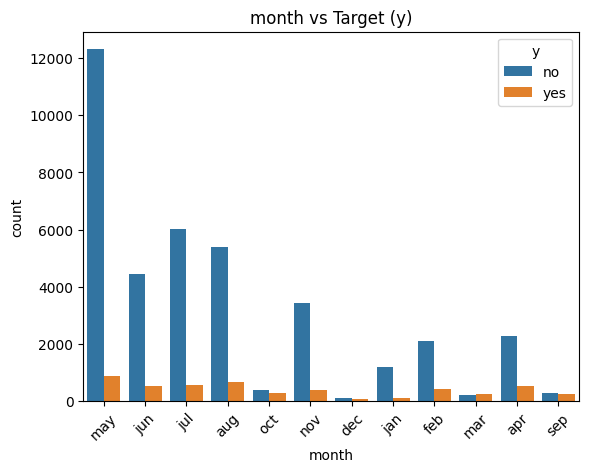

Analyzing relationship between 'poutcome' and 'y'...
y            no   yes
poutcome             
failure   36184  3811
other      1481   293
success     507   917
Chi-Square Statistic = 4072.4515848334268, p-value = 0.0



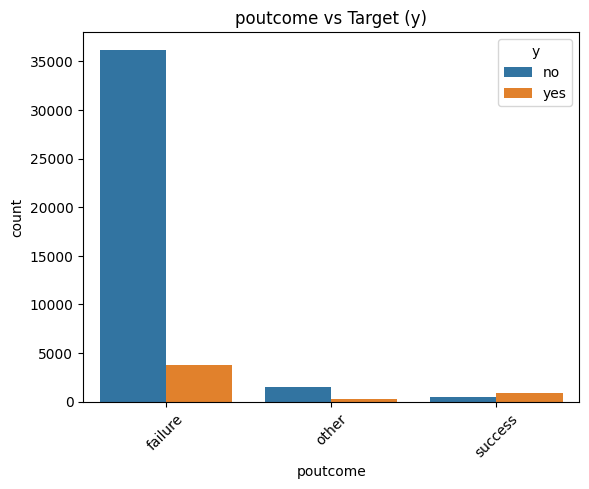

In [19]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each categorical column
for col in categorical_columns:
    if col != 'y':  # Skip the target column itself
        print(f"Analyzing relationship between '{col}' and 'y'...")

        # Cross-tabulation
        crosstab = pd.crosstab(df_cleaned[col], df_cleaned['y'])
        print(crosstab)

        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Chi-Square Statistic = {chi2}, p-value = {p}\n")

        # Visualization: Bar plot
        sns.countplot(x=col, hue='y', data=df_cleaned)
        plt.title(f"{col} vs Target (y)")
        plt.xticks(rotation=45)
        plt.show()


Analyzing relationship between 'age' and 'y'...


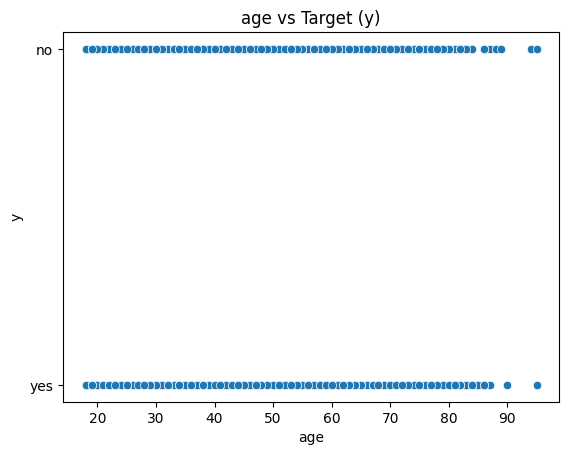

Analyzing relationship between 'balance' and 'y'...


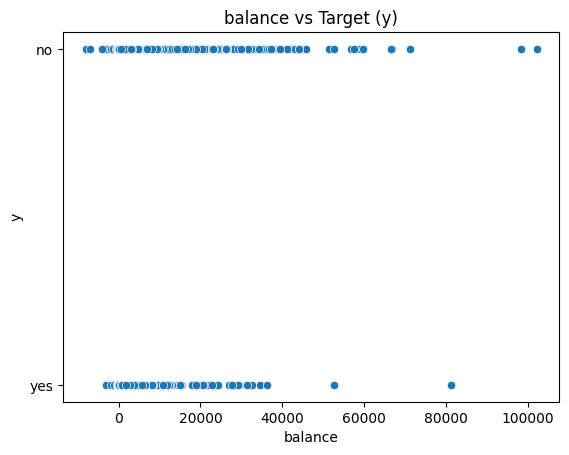

Analyzing relationship between 'day_of_week' and 'y'...


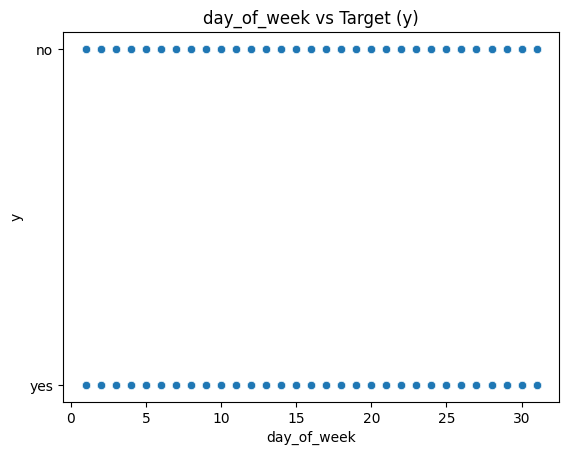

Analyzing relationship between 'duration' and 'y'...


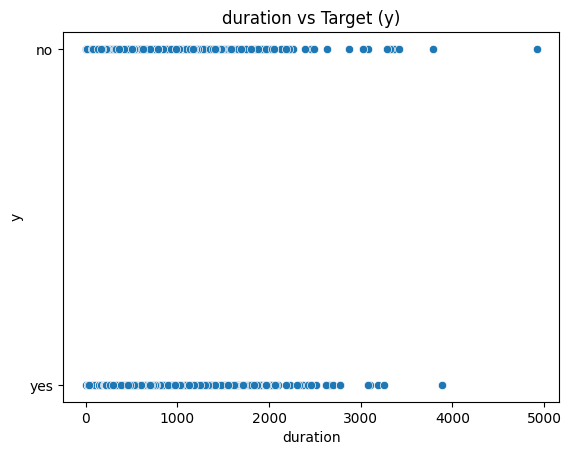

Analyzing relationship between 'campaign' and 'y'...


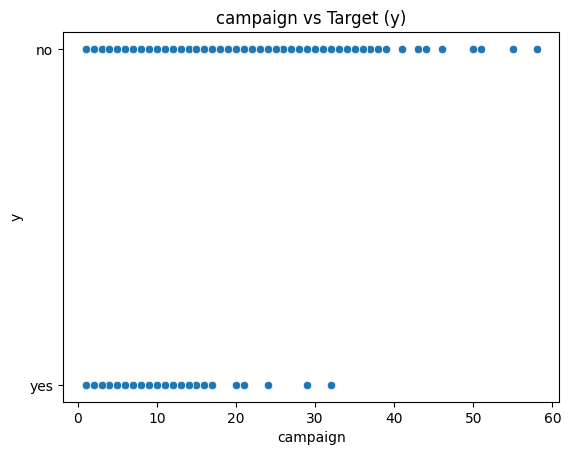

Analyzing relationship between 'pdays' and 'y'...


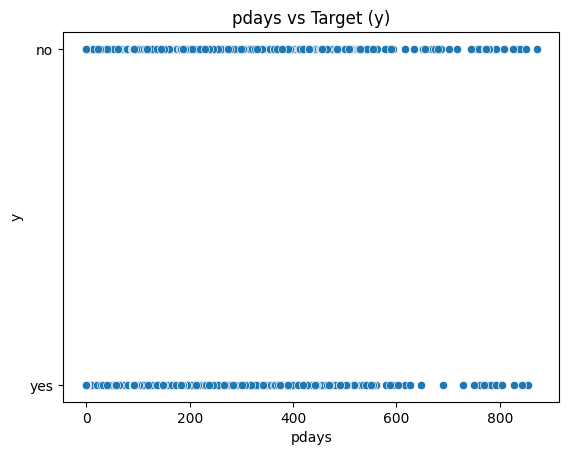

Analyzing relationship between 'previous' and 'y'...


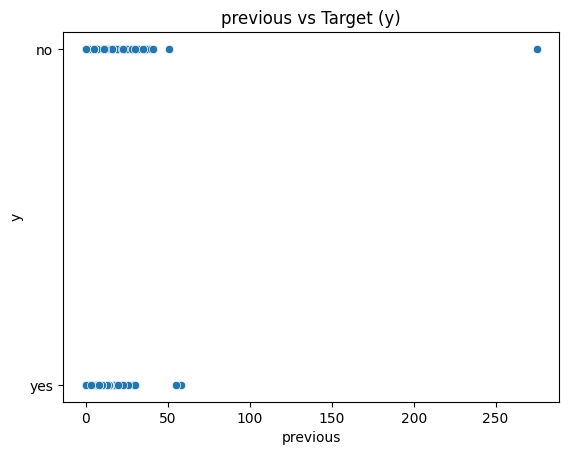

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column
for col in numerical_columns:
    print(f"Analyzing relationship between '{col}' and 'y'...")

    # Scatter plot
    sns.scatterplot(x=col, y='y', data=df_cleaned)
    plt.title(f"{col} vs Target (y)")
    plt.xlabel(col)
    plt.ylabel("y")
    plt.show()


In [21]:
df_cleaned = df_cleaned.drop(columns=['day_of_week'])
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact month  duration  campaign  pdays  

In [22]:
 from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.drop(columns=['y']),  # Features
    df_cleaned['y'],                # Target
    test_size=0.2,                  # 20% test data
    random_state=42                 # For reproducibility
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (34554, 15)
Testing data shape: (8639, 15)


In [23]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
encoder = LabelEncoder()

# Encode categorical columns for both train and test
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

print("Training Data after Label Encoding:")
print(X_train.head())

print("\nTesting Data after Label Encoding:")
print(X_test.head())

# y_train[col] = encoder.fit_transform(y_train[col])
# y_test[col] = encoder.transform(y_test[col])



Training Data after Label Encoding:
       age  job  marital  education  default  balance  housing  loan  contact  \
17202   35    6        1          1        0     5613        1     0        0   
38686   27    0        1          1        0     1417        1     0        0   
9463    46    6        2          1        0     2899        0     0        2   
14659   35    4        1          2        0      300        1     0        0   
19508   52    4        2          2        0      741        0     0        0   

       month  duration  campaign  pdays  previous  poutcome  
17202      5       699         3     -1         0         0  
38686      8       143         2    343         3         0  
9463       6        40         1     -1         0         0  
14659      5       555         2     -1         0         0  
19508      1        63         2     -1         0         0  

Testing Data after Label Encoding:
       age  job  marital  education  default  balance  housing  loan 

In [15]:
print(y_train.head)

<bound method NDFrame.head of 15635     no
29426     no
33302     no
39068     no
19012     no
        ... 
6578      no
11898     no
39677    yes
946       no
16571     no
Name: y, Length: 34683, dtype: object>


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9073
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7658
         yes       0.65      0.40      0.50       981

    accuracy                           0.91      8639
   macro avg       0.79      0.69      0.72      8639
weighted avg       0.90      0.91      0.90      8639



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9034
Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.94      0.95      7638
         yes       0.59      0.60      0.60      1033

    accuracy                           0.90      8671
   macro avg       0.77      0.77      0.77      8671
weighted avg       0.90      0.90      0.90      8671



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],          # Minimum samples in a leaf node
    'class_weight': ['balanced', None]      # Class weighting strategies
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Predict on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the fine-tuned Random Forest
print("Fine-Tuned Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9038
Fine-Tuned Random Forest Results:
Accuracy: 0.9059
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7638
         yes       0.69      0.38      0.49      1033

    accuracy                           0.91      8671
   macro avg       0.81      0.68      0.72      8671
weighted avg       0.89      0.91      0.89      8671



In [17]:
print(y_train.head)

<bound method NDFrame.head of 15635     no
29426     no
33302     no
39068     no
19012     no
        ... 
6578      no
11898     no
39677    yes
946       no
16571     no
Name: y, Length: 34683, dtype: object>


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
                          activation='relu',            # ReLU activation function
                          solver='adam',                # Adam optimizer
                          max_iter=300,                 # Maximum number of iterations
                          random_state=42)              # For reproducibility

# Train the Neural Network
print("Training the Neural Network...")
nn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))


Training the Neural Network...
Neural Network Results:
Accuracy: 0.8974
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7658
         yes       0.60      0.29      0.39       981

    accuracy                           0.90      8639
   macro avg       0.76      0.63      0.67      8639
weighted avg       0.88      0.90      0.88      8639



In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (128, 64), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.0001],
    'alpha': [0.0001, 0.001, 0.01],
}

# Initialize model
nn_model = MLPClassifier(max_iter=300, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 754, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/loca

Best Parameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.8983


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two hidden layers with 100 and 50 neurons
                          activation='logistic',            # ReLU activation function
                          solver='adam',                # Adam optimizer
                          learning_rate_init=0.0001,                 # Maximum number of iterations
                          random_state=42,
                          alpha=0.01)              # For reproducibility

# Train the Neural Network
print("Training the Neural Network...")
nn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

Training the Neural Network...
Neural Network Results:
Accuracy: 0.8998
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7638
         yes       0.65      0.34      0.45      1033

    accuracy                           0.90      8671
   macro avg       0.78      0.66      0.70      8671
weighted avg       0.88      0.90      0.89      8671

